In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Eigenvectors and Eigenvalues of a matrix


M = 
 [[5. 1.]
 [1. 3.]]


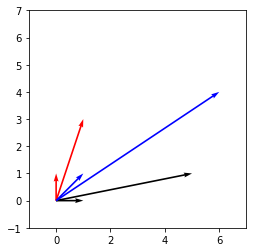

In [2]:
M = np.array([[5.0,1.0],[1.0,3.0]])
print("M = \n",M)

vx = np.array([[1.0],[0.0]]) # unit vector parallel to x
vy = np.array([[0.0],[1.0]]) # unit vector parallel to y
mvx = M.dot(vx) # A*v1
mvy = M.dot(vy) # A*v1
vxvy = vx+vy
mvxvy = M.dot(vxvy)

fig,ax = plt.subplots(1,1)
ax.quiver(0,0,vx[0],vx[1],scale=1.0,scale_units='x')
ax.quiver(0,0,mvx[0],mvx[1],scale=1.0,scale_units='x')

ax.quiver(0,0,vy[0],vy[1],color='r',scale=1.0,scale_units='x')
ax.quiver(0,0,mvy[0],mvy[1],color='r',scale=1.0,scale_units='x')

ax.quiver(0,0,vxvy[0],vxvy[1],color='b',scale=1.0,scale_units='x')
ax.quiver(0,0,mvxvy[0],mvxvy[1],color='b',scale=1.0,scale_units='x')

ax.set_xlim([-1,7])
ax.set_ylim([-1,7])
ax.set_aspect('equal','box')
plt.show()

In [3]:
# Calculate the eigenvectors and eigenvalues using NumPy
v,d = np.linalg.eig(M)
print("eigenvalues ",v)
print("eigenvectors (in columns):\n",d)

eigenvalues  [5.41421356 2.58578644]
eigenvectors (in columns):
 [[ 0.92387953 -0.38268343]
 [ 0.38268343  0.92387953]]


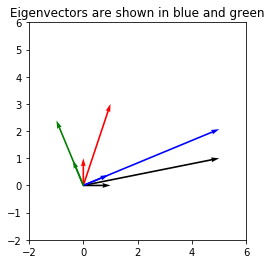

In [4]:
# plot the eigenvectors and their distortion under M
v0 = d[:,0] #0th eigenvector
v1 = d[:,1] #1st eigenvector

mv0 = M.dot(v0)
mv1 = M.dot(v1)

fig,ax = plt.subplots(1,1)
ax.quiver(0,0,vx[0],vx[1],scale=1.0,scale_units='x')
ax.quiver(0,0,mvx[0],mvx[1],scale=1.0,scale_units='x')

ax.quiver(0,0,vy[0],vy[1],color='r',scale=1.0,scale_units='x')
ax.quiver(0,0,mvy[0],mvy[1],color='r',scale=1.0,scale_units='x')

ax.quiver(0,0,v0[0],v0[1],color='b',scale=1.0,scale_units='x')
ax.quiver(0,0,mv0[0],mv0[1],color='b',scale=1.0,scale_units='x')

ax.quiver(0,0,v1[0],v1[1],color='g',scale=1.0,scale_units='x')
ax.quiver(0,0,mv1[0],mv1[1],color='g',scale=1.0,scale_units='x')
ax.set_title('Eigenvectors are shown in blue and green')

ax.set_xlim([-2,6])
ax.set_ylim([-2,6])
ax.set_aspect('equal','box')
plt.show()

## Generate synthetic 2D data and calculate covariance matrix
The code below generates a sample of `N` measurements of quantities x and y. The parameters are sampled from a  multivariate normal distribution. The means of the parameters are specified, as are the shape parameters $\sigma_x^2$, $\sigma_y^2$ and the covariance $\sigma_{xy}$.

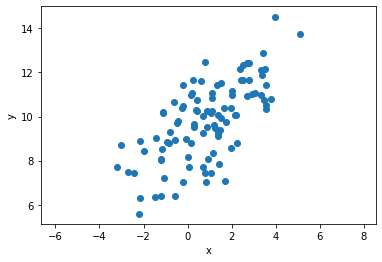

In [5]:
import numpy as np
N = 100          # number of samples
xmean = 1.0
ymean = 10.0
s2_x = 4.0       # variance for x
s2_y = 4.0       # variance for y
s_xy = 3.0       # covariance between x and y

true_covariance_matrix = [[s2_x,s_xy],[s_xy,s2_y]]
# Generate random numbers from a multivariate normal distribution described by the true covariance matrix above
samples = np.random.multivariate_normal([xmean,ymean],true_covariance_matrix,N)
x=samples[:,0]
y=samples[:,1]

plt.figure()
plt.scatter(x,y)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The code below calculates from the samples an unbiased estimate of the variances of x and y and the covariance $\sigma_{xy}$.

In [6]:
dx=x-x.mean() # Note that numpy arrays know how to evaluate their own mean
dy=y-y.mean()

s2x = 1/(N-1)*np.sum(dx**2)
s2y = 1/(N-1)*np.sum(dy**2)
sxy = 1/(N-1)*np.sum(dx*dy)
print('s2x=',s2x)
print('s2y=',s2y)
print('sxy=',sxy)

s2x= 3.081640521488137
s2y= 3.112480603400289
sxy= 2.074605286118928


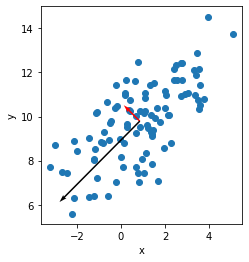

In [7]:
# Form the covariance matrix and compute its eigenvalues and eigenvectors
sample_covariance_matrix = [[s2x,sxy],[sxy,s2y]]
v,Q = np.linalg.eig( sample_covariance_matrix )

# plot the data with the eigenvectors, scaled by the eigenvalues
fig,ax = plt.subplots(1,1)
ax.scatter(x,y)
#0th eigenvector scaled by 0th eigenvalue
ax.quiver(x.mean(),y.mean(),Q[0,0]*v[0],Q[1,0]*v[0],color='r',scale=1.0,scale_units='x')
#1st eigenvector scaled by 1st eigenvalue
ax.quiver(x.mean(),y.mean(),Q[0,1]*v[1],Q[1,1]*v[1],color='k',scale=1.0,scale_units='x')

ax.set_aspect('equal','box')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

Covariance matrix for xp,yp
: [[ 1.02239797e+00 -6.68794091e-16]
 [-6.68794091e-16  5.17172315e+00]]


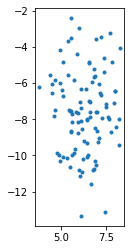

In [8]:
# compute xp and yp, the representation of x and y in the coordinate system defined by the eigenvectors
xy = np.stack([x,y]) # combine x and y in to a 2xN array
xpyp = Q.transpose().dot(xy) # calculte x' and y' as Q^T [x; y] (returns 2xN array of x', y' values)
print('Covariance matrix for xp,yp\n:',
      np.cov(xpyp[0,:],xpyp[1,:]) )

plt.figure()
plt.plot(xpyp[0,:],xpyp[1,:],'.')
ax=plt.gca()
ax.set_aspect('equal','box')
plt.show()

# Calculate PCA using scikit-learn

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

The way to use this function is to
1. Create a context/instance of a PCA analysis (think of our_pca as a description of the analysis that will be applied to the data).
2. Apply the analysis using our_pca.fit(X). X must have shape (number of data points) x (number of data dimensions)

For the 2D example above, X should be Nx2

In [9]:
from sklearn.decomposition import PCA
X = np.stack((x,y)).transpose()
print('Shape of X:',X.shape)
our_pca = PCA(n_components=2) # This creates a context in which PCA can be performed
our_pca.fit(X) #

Shape of X: (100, 2)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

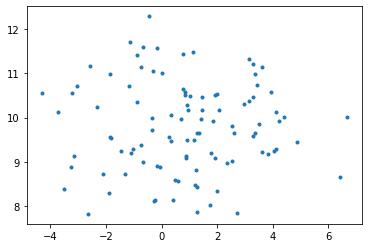

In [10]:
xp = our_pca.transform(X)
plt.figure()
plt.plot(xp[:,0]+our_pca.mean_[0],xp[:,1]+our_pca.mean_[1],'.')
plt.show()

In [ ]:
# Print out mean values
print('mean values:',our_pca.mean_)
# print out variance explained by each component:
print('Fraction of variance explained:',our_pca.explained_variance_ratio_)
# print out components:
print('Components:',our_pca.components_)